In [17]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

In [18]:
# load history data
boid_poses = np.load('opt_history_pos.npy')
boid_velocities = np.load('opt_history_vel.npy')

N_steps, N_boids = boid_poses.shape[:2]

boid_poses.shape, boid_velocities.shape

((11, 50, 10, 2), (11, 50, 10, 2))

In [19]:
# reshape data
boid_poses = boid_poses.reshape(N_steps, N_boids, -1)
boid_velocities = boid_velocities.reshape(N_steps, N_boids, -1)

boid_poses.shape, boid_velocities.shape

((11, 50, 20), (11, 50, 20))

In [20]:
# dimensionality reduction with PCA

pca = PCA(n_components=2)
boid_poses_2d = pca.fit_transform(boid_poses.reshape(N_steps * N_boids, -1)).reshape(N_steps, N_boids, -1)
boid_velocities_2d = pca.fit_transform(boid_velocities.reshape(N_steps * N_boids, -1)).reshape(N_steps, N_boids, -1)

boid_poses_2d.shape, boid_velocities_2d.shape

((11, 50, 2), (11, 50, 2))

In [21]:
# dataframe building

df = pd.DataFrame({'step': np.repeat(np.arange(N_steps), N_boids),
                   'boid_id': np.repeat(np.arange(N_boids), N_steps).reshape(N_boids, N_steps).T.flatten(),
                   'pca_0': boid_poses_2d[:, :, 0].flatten(),
                   'pca_1': boid_poses_2d[:, :, 1].flatten(),
                   'vel_0': boid_velocities_2d[:, :, 0].flatten(),
                   'vel_1': boid_velocities_2d[:, :, 1].flatten()})
df

,step,boid_id,pca_0,pca_1,vel_0,vel_1
0,0,0,-24.602939,-11.051727,2.174938,-0.591022
1,0,1,9.993707,-42.710676,1.390139,0.758242
2,0,2,40.780623,0.972791,5.094217,0.274120
3,0,3,14.850850,-9.073300,2.715094,1.836449
4,0,4,20.281799,-8.183650,-0.952403,1.988382
...,...,...,...,...,...,...
545,10,45,5.735366,40.520522,1.703792,-2.837312
546,10,46,-18.981392,10.634491,-1.394504,-0.091650
547,10,47,-3.665664,19.576604,-2.023227,-0.955071
548,10,48,2.104518,-17.117063,-2.843649,1.132331


In [22]:
df[df['boid_id'] == 3]

,step,boid_id,pca_0,pca_1,vel_0,vel_1
3,0,3,14.850850,-9.073300,2.715094,1.836449
53,1,3,14.693312,-9.081850,2.140334,1.645365
103,2,3,14.537100,-9.089794,2.115888,1.633599
153,3,3,14.411375,-9.077464,1.410390,1.402510
203,4,3,14.297936,-9.050553,0.992102,1.348233
253,5,3,14.214249,-8.999715,0.257975,1.190135
303,6,3,14.147055,-8.947237,-0.062956,1.122174
353,7,3,14.100427,-8.892540,-0.461989,1.042193
403,8,3,14.074211,-8.835266,-0.834858,0.988482
453,9,3,14.054359,-8.776297,-0.968304,1.014557


<Axes: xlabel='pca_0', ylabel='pca_1'>

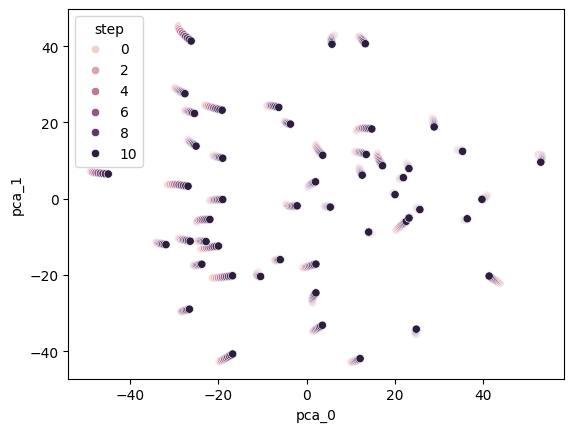

In [23]:
sns.scatterplot(df, x='pca_0', y='pca_1', hue='step')

<Axes: xlabel='vel_0', ylabel='vel_1'>

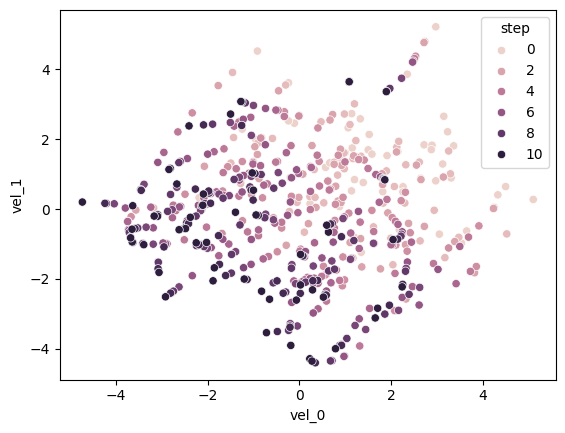

In [24]:
# visualize velocities

sns.scatterplot(df, x='vel_0', y='vel_1', hue='step')